### Linear regression using numpy

In [1]:
import torch
import matplotlib.pyplot as plt


In [2]:
# f = w*x , dont care about bias
# let w =2
# f = 2*x

In [38]:
X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,4,6,8],dtype=torch.float32)
w = torch.tensor(0.0,dtype = torch.float32, requires_grad=True)
print(X,Y,w)

tensor([1., 2., 3., 4.]) tensor([2., 4., 6., 8.]) tensor(0., requires_grad=True)


In [39]:
# model prediction
def forward(x):
    return w*x

# loss - MSE
def loss(y,y_predicted):
    return ((y_predicted -y)**2).mean()

# gradient
# MSE = 1/N * (w*x -y)**2
# dMSE/dw = 1/N * (2 *(w*x -y)) * (x)  = 1/N * 2x * (w*x -y)



In [40]:
print(f'pred before taining : f(5) = {forward(X)}')

pred before taining : f(5) = tensor([0., 0., 0., 0.], grad_fn=<MulBackward0>)


In [41]:
# training 
lr =  0.01  
n_iters = 100

loss_tracker= []
for epoch in range(n_iters):
    # forward pass  - prediction
    y_pred = forward(X)
    
    #loss
    l = loss(Y, y_pred)
    loss_tracker.append(l)
    if epoch % 5 ==0:
        print(f'loss after epoch :{epoch} = {l}')
    
    # gradients 
    l.backward() #dl/dw
    # update the weights
    with torch.no_grad():
        w -= lr * w.grad
    
    # zero gradients
    w.grad.zero_()
    

loss after epoch :0 = 30.0
loss after epoch :5 = 5.9062323570251465
loss after epoch :10 = 1.1627856492996216
loss after epoch :15 = 0.22892260551452637
loss after epoch :20 = 0.0450688973069191
loss after epoch :25 = 0.008872910402715206
loss after epoch :30 = 0.0017468547448515892
loss after epoch :35 = 0.00034391897497698665
loss after epoch :40 = 6.770494655938819e-05
loss after epoch :45 = 1.3328777640708722e-05
loss after epoch :50 = 2.6243997126584873e-06
loss after epoch :55 = 5.168862458049261e-07
loss after epoch :60 = 1.0175587306093803e-07
loss after epoch :65 = 2.0093764874218323e-08
loss after epoch :70 = 3.9741685498029256e-09
loss after epoch :75 = 7.718661265698756e-10
loss after epoch :80 = 1.4670220593870908e-10
loss after epoch :85 = 2.7284841053187847e-11
loss after epoch :90 = 5.076827847005916e-12
loss after epoch :95 = 8.988365607365267e-13


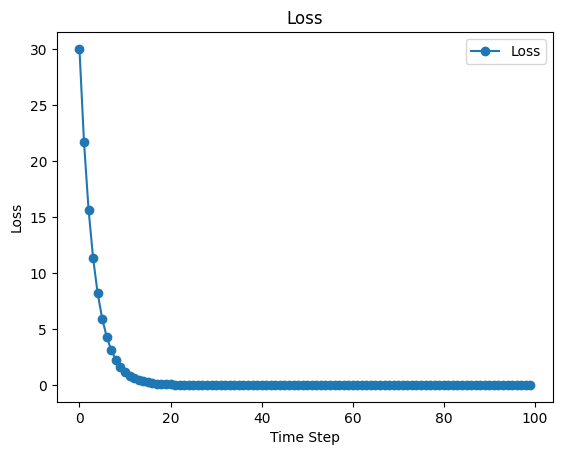

In [62]:
import torch

scalar_values = [tensor.detach().item() for tensor in loss_tracker]

# Plot the scalar values
plt.plot(scalar_values, marker='o', linestyle='-', label='Loss')

# Add labels and title
plt.xlabel('Time Step')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

# Display the plot
plt.show()
